# Case Study: Kids First

The Kids First Data Resource Center [https://doi.org/10.1093/neuonc/noaa222.200] tracks samples from pediatric research, including childhood cancers and structural birth defects. A single study with 1765 patients, 2281 specimens, 664 Observations and 38394 DocumentReferences are included.  The DocumentReference url field contains DRS url values.


In [1]:
!ls -l kids_first/SD_PET7Q6F2


total 43136
-rw-rw-r-- 1 jupyter users 40544858 Jun 27 19:41 DocumentReference.ndjson
-rw-rw-r-- 1 jupyter users   504208 Jun 27 19:41 Observation.ndjson
-rw-rw-r-- 1 jupyter users   947072 Jun 27 19:41 Patient.ndjson
-rw-rw-r-- 1 jupyter users      853 Jun 27 19:41 ResearchStudy.ndjson
-rw-rw-r-- 1 jupyter users   651505 Jun 27 19:41 ResearchSubject.ndjson
-rw-rw-r-- 1 jupyter users  1504022 Jun 27 19:41 Specimen.ndjson


In [2]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [3]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide
 

In [4]:
from glob import glob
kf_file_paths = glob('kids_first/SD_PET7Q6F2/*.ndjson')

In [5]:
graph = load_graph('kf', kf_file_paths, expected_resource_count=8481, check_edges=True)
'loaded'

'loaded'

### Draw a summary graph

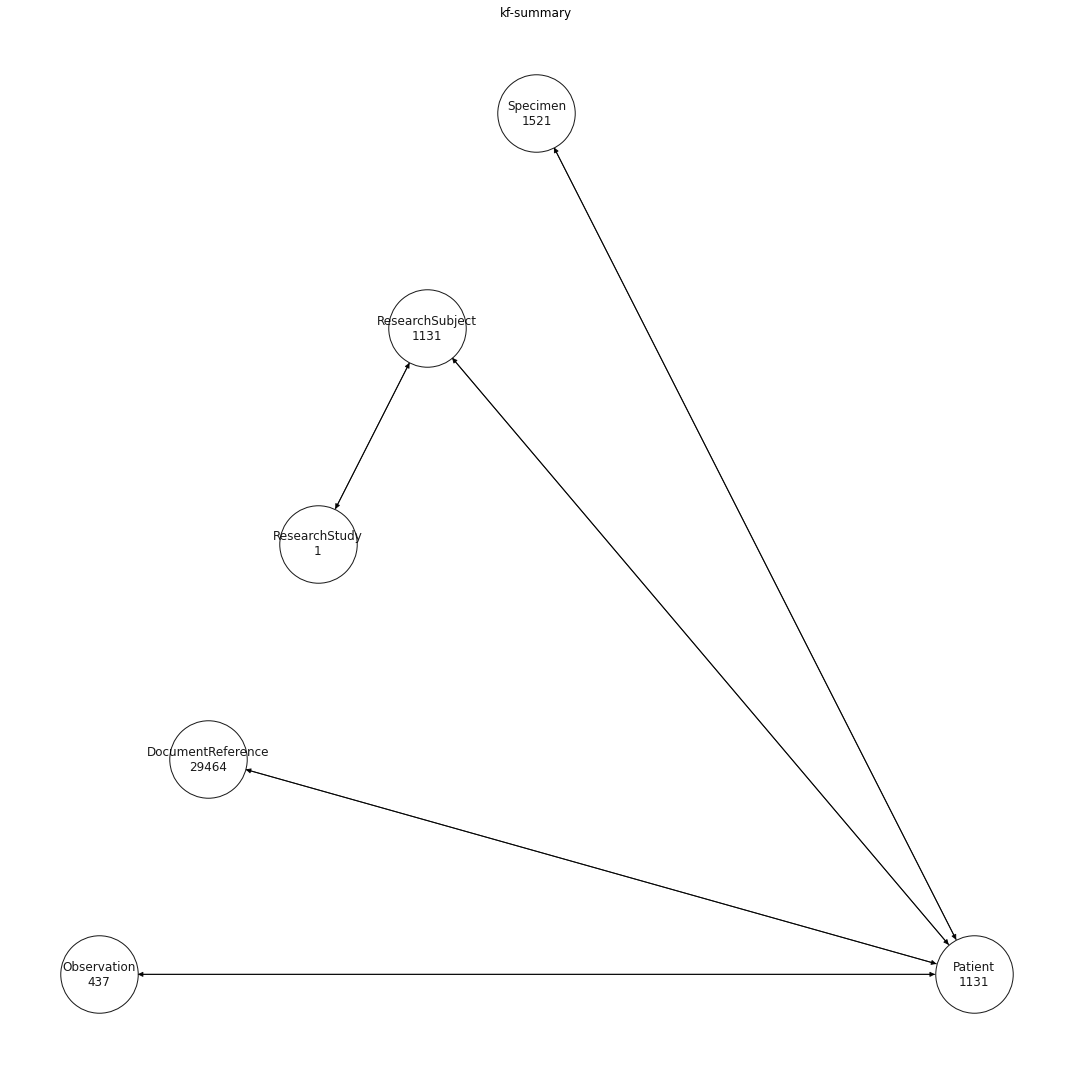

In [6]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'kf-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [7]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 1131, "should have 1131 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [8]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile_0,meta_tag_0_code,extension_0_extension_0_url,extension_0_extension_0_valueString,extension_0_url,extension_1_extension_0_url,...,gender,resourceType,extension_0_extension_1_url,extension_0_extension_1_valueCoding_system,extension_0_extension_1_valueCoding_code,extension_0_extension_1_valueCoding_display,extension_1_extension_1_url,extension_1_extension_1_valueCoding_system,extension_1_extension_1_valueCoding_code,extension_1_extension_1_valueCoding_display
0,34202,2,2021-11-16T08:22:39.050+00:00,#hKpfkJOSzACtoOj0,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34201,2,2021-11-16T08:22:39.404+00:00,#syjPLR1naXV2D9ua,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,White,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,female,Patient,ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,2186-5,Not Hispanic or Latino
2,34244,2,2021-11-16T08:22:39.578+00:00,#JaDMJbRv4z9nDjmP,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34254,2,2021-11-16T08:22:39.715+00:00,#PrS4kX2TocINwoh6,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34205,2,2021-11-16T08:22:39.943+00:00,#oeLlfQ2By8dJ4Bhq,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,35271,2,2021-11-16T08:23:11.458+00:00,#50opUaaBTT7LoX0B,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,35297,2,2021-11-16T08:23:11.636+00:00,#srHoRWoZyIxoTzIK,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,White,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,female,Patient,ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,2186-5,Not Hispanic or Latino
1128,35307,2,2021-11-16T08:23:11.898+00:00,#aeczssvQNsYLvEBb,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,35314,2,2021-11-16T08:23:12.149+00:00,#8ZonMmBmFKEDpcUO,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,text,Not Reported,http://hl7.org/fhir/us/core/StructureDefinitio...,text,...,unknown,Patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Show simplified details

> 1/3 the number of columns

In [9]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] ).fillna('')

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile,meta_tag_,extension_us-core-race,extension_us-core-ethnicity,identifier_,identifier_https://kf-api-dataservice.kidsfirstdrc.org/participants/,identifier_urn:kids-first:unique-string,gender
0,34202,2,2021-11-16T08:22:39.050000+00:00,#hKpfkJOSzACtoOj0,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAXLYF,PT_8WQNR0T4,Patient-SD_PET7Q6F2-PT_8WQNR0T4,unknown
1,34201,2,2021-11-16T08:22:39.404000+00:00,#syjPLR1naXV2D9ua,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,White|2106-3,Not Hispanic or Latino|2186-5,PAWUMM,PT_ZFWSHC0E,Patient-SD_PET7Q6F2-PT_ZFWSHC0E,female
2,34244,2,2021-11-16T08:22:39.578000+00:00,#JaDMJbRv4z9nDjmP,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAWNHU,PT_KHF0DDQ8,Patient-SD_PET7Q6F2-PT_KHF0DDQ8,unknown
3,34254,2,2021-11-16T08:22:39.715000+00:00,#PrS4kX2TocINwoh6,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAVNZB,PT_WZB5F4AC,Patient-SD_PET7Q6F2-PT_WZB5F4AC,unknown
4,34205,2,2021-11-16T08:22:39.943000+00:00,#oeLlfQ2By8dJ4Bhq,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAXFEX,PT_48A15WEZ,Patient-SD_PET7Q6F2-PT_48A15WEZ,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1126,35271,2,2021-11-16T08:23:11.458000+00:00,#50opUaaBTT7LoX0B,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAWKIW,PT_AAERB842,Patient-SD_PET7Q6F2-PT_AAERB842,unknown
1127,35297,2,2021-11-16T08:23:11.636000+00:00,#srHoRWoZyIxoTzIK,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,White|2106-3,Not Hispanic or Latino|2186-5,PAVGKS,PT_YKQPY4J4,Patient-SD_PET7Q6F2-PT_YKQPY4J4,female
1128,35307,2,2021-11-16T08:23:11.898000+00:00,#aeczssvQNsYLvEBb,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAXBXU,PT_P1SBEJY8,Patient-SD_PET7Q6F2-PT_P1SBEJY8,unknown
1129,35314,2,2021-11-16T08:23:12.149000+00:00,#8ZonMmBmFKEDpcUO,http://hl7.org/fhir/StructureDefinition/Patient,SD_PET7Q6F2,Not Reported,Not Reported,PAWIUT,PT_V3QTGQVQ,Patient-SD_PET7Q6F2-PT_V3QTGQVQ,unknown


## Navigate using FHIR references

In [10]:
document_references = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'DocumentReference')]
patients = set([graph.nodes.get(document_reference.subject.reference)['resource'] for document_reference in document_references])
f"document_references: {len(document_references)} patients: {len(patients)}"

'document_references: 29464 patients: 1131'

In [11]:

pd.DataFrame([
    {
        **{
            'subject': d.subject.reference,
            'type': document_references[0].type.text,
            'url': d.content[0].attachment.url,
            'security': d.securityLabel[0].coding[0].code,
            'format': d.content[1].format.display,
        }
        
    }
    for d in document_references if d.securityLabel and d.securityLabel[0].coding and d.securityLabel[0].coding[0].code == 'U'] 
)

""


In [12]:

observations = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'Observation')]

records = []

for o in observations:
    attributes = {
            'subject': o.subject.reference if o.subject else None,
            'specimen': o.specimen.reference if o.specimen else None,
            'code': o.code.text if o.code.text else o.code.coding[0].display,
            'valueQuantity': o.valueQuantity.value if o.valueQuantity else None,
            'valueQuantity_unit': o.valueQuantity.unit if o.valueQuantity else None,
            'valueCodeableConcept': o.valueCodeableConcept.coding[0].display if o.valueCodeableConcept else None
        }
    components = {}
    if o.component:
        components = {
            c.code.coding[0].display if c.code.coding[0].display else c.code.coding[0].code:
            c.valueCodeableConcept.coding[0].display if c.valueCodeableConcept.coding else c.valueCodeableConcept.text
            for c in o.component if c.valueCodeableConcept
        }        
    records.append({**attributes, **components})

pd.DataFrame(records).fillna('')

,subject,specimen,code,valueQuantity,valueQuantity_unit,valueCodeableConcept
0,Patient/34195,,Clinical status,,,Dead
1,Patient/34210,,Clinical status,,,Alive
2,Patient/34252,,Clinical status,,,Dead
3,Patient/34258,,Clinical status,,,Alive
4,Patient/34293,,Clinical status,,,Dead
...,...,...,...,...,...,...
432,Patient/35259,,Clinical status,,,Alive
433,Patient/35297,,Clinical status,,,Dead
434,Patient/35308,,Clinical status,,,Alive
435,Patient/35262,,Clinical status,,,Dead
